Iteration 0: Cost = 0.6914
Iteration 100: Cost = 0.5539
Iteration 200: Cost = 0.4675
Iteration 300: Cost = 0.4098
Iteration 400: Cost = 0.3690
Iteration 500: Cost = 0.3387
Iteration 600: Cost = 0.3152
Iteration 700: Cost = 0.2964
Iteration 800: Cost = 0.2810
Iteration 900: Cost = 0.2681


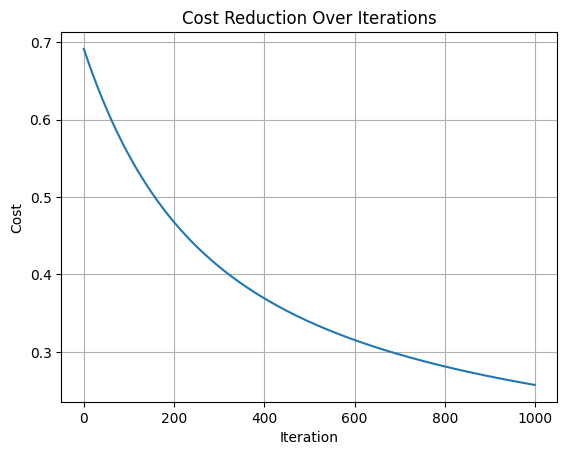


Final Theta values:
[[0.44274622]
 [0.57419038]
 [1.77043648]
 [0.01761295]
 [0.06282988]
 [0.04035993]]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('Student_Performance.csv')
df.dropna(inplace=True)
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
df['Performance Index'] = (df['Performance Index'] >= 50).astype(int)
X = df.drop('Performance Index', axis=1).values
y = df['Performance Index'].values.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]
theta = np.zeros((X_b.shape[1], 1))
alpha = 0.01
n_iterations = 1000
lambda_reg = 0.1
m = len(y)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X_b, y, theta):
    pred = sigmoid(X_b.dot(theta))
    epsilon = 1e-5
    cost = -(1/m) * np.sum(y * np.log(pred + epsilon) + (1 - y) * np.log(1 - pred + epsilon))
    reg = (lambda_reg / (2*m)) * np.sum(theta[1:] ** 2)
    return cost + reg

cost_history = []
for i in range(n_iterations):
    pred = sigmoid(X_b.dot(theta))
    error = pred - y
    gradients = (1/m) * X_b.T.dot(error)
    gradients[1:] += (lambda_reg / m) * theta[1:]
    theta -= alpha * gradients
    cost = cost_function(X_b, y, theta)
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

plt.plot(cost_history)
plt.title("Cost Reduction Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

print("\nFinal Theta values:")
print(theta)
